# Classification II: Logistic Regression

**OBJECTIVES**:

- Differentiate between *Regression* and *Classification* problem settings
- Connect Least Squares methods to Classification through Logistic Regression
- Interpret coefficients of the model in terms of probabilities
- Discuss performance of classification model in terms of accuracy
- Understand the effect of an imbalanced target class on model performance

### Classification Problems as Predicting Categorical Target Feature



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, load_digits, load_iris

### Some example datasets in sklearn for classification
<center>
<img src = https://archive.ics.uci.edu/ml/assets/MLimages/Large14.jpg>
</center>

In [4]:
cancer = load_breast_cancer()
#print(cancer.DESCR)
#think of the dataset as a class with attributes
#.data
#.target
#.feature_names
X = cancer.data
y = cancer.target

In [5]:
#create a dataframe
cancer_df = pd.DataFrame(X, columns = cancer.feature_names)
cancer_df['malignant'] = cancer.target
cancer_df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [10]:
cancer_df.loc[cancer_df['malignant'] == 0]['mean radius'].head()

0    17.99
1    20.57
2    19.69
3    11.42
4    20.29
Name: mean radius, dtype: float64

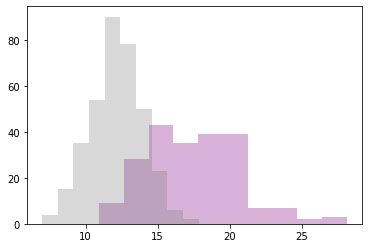

In [14]:
#histogram of mean radius by malignance
plt.hist(cancer_df.loc[cancer_df['malignant'] == 0]['mean radius'], color = 'purple', alpha = 0.3);
plt.hist(cancer_df.loc[cancer_df['malignant'] == 1]['mean radius'], color = 'grey', alpha = 0.3);
# plt.hist(cancer_df['mean radius']);

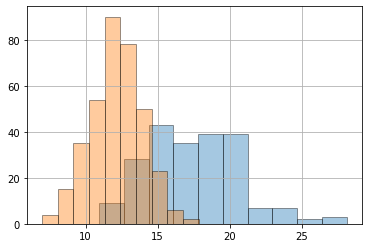

In [18]:
cancer_df.groupby('malignant')['mean radius'].hist(alpha = 0.4, edgecolor = 'black');

### Our Motivating Example



In [19]:
default = pd.read_csv('data/Default.csv', index_col = 0)

In [20]:
default.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


In [21]:
default.head(2)

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700


### Visualizing Default by Continuous Features

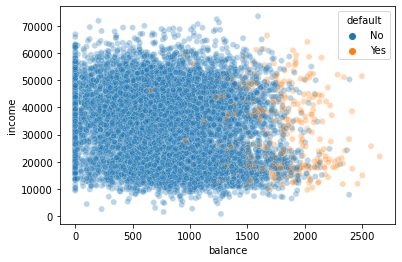

In [23]:
#scatterplot of balance vs. income colored by default status
sns.scatterplot(x = 'balance', y = 'income', data = default, hue = 'default', alpha = 0.3);

In [ ]:
#boxplots for balance and income by default


### Considering only `balance` as the predictor



In [24]:
default.head(2)

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700


In [27]:
#create binary default column
default['binary_default'] = np.where(default['default'] == 'No', 0, 1)

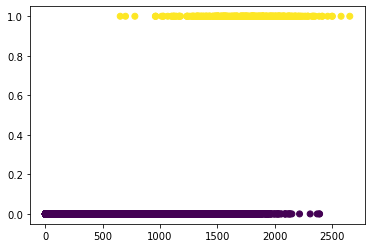

In [29]:
#scatter of Balance vs Default
plt.scatter(default['balance'], default['binary_default'], c = default['binary_default'])

##### PROBLEM

1. Build a `LinearRegression` model with balance as the predictor.
2. Interpret the $mse$ for your regressor.
3. Predict the default for balances: `[500, 1000, 1500, 2000, 2500]`.  Do these make sense?

In [31]:
lr = LinearRegression().fit(default[['balance']], default['binary_default'])

new_balances = np.array([500, 1000, 1500, 2000, 2500]).reshape(-1, 1)

lr.predict(new_balances)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.01025587,  0.05468022,  0.11961631,  0.1845524 ,  0.2494885 ])

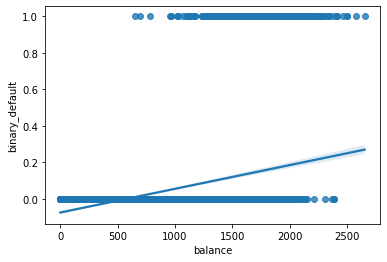

In [32]:
sns.regplot(x = default[['balance']], y = default['binary_default'])

### The Sigmoid aka Logistic Function


$$y = \frac{1}{1 + e^{-x}}$$

In [38]:
#define the logistic
def logistic(x):
    return 1/(1 + np.exp(-x))

In [41]:
#domain
x = np.linspace(-5, 5, 100)

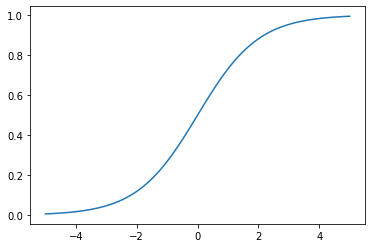

In [42]:
#plot it
plt.plot(x, logistic(x))

### Usage should seem familiar

Fit a `LogisticRegression` estimator from `sklearn` on the features:

```python 
X = default[['balance']]
y = default['binary_default']
```

In [43]:
#instantiate
lgr = LogisticRegression()

In [44]:
#define X and y
X = default[['balance']]
y = default['binary_default']

In [45]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
#fit on the train
lgr.fit(X_train, y_train)

LogisticRegression()

In [49]:
#examine train and test scores
print(f'Train Accuracy: {lgr.score(X_train, y_train)}')
print(f'Test Accuracy: {lgr.score(X_test, y_test)}')

Train Accuracy: 0.9728
Test Accuracy: 0.9716


In [50]:
default['binary_default'].value_counts(normalize = True)

0    0.9667
1    0.0333
Name: binary_default, dtype: float64

### Similarities to our earlier work

In [51]:
#there is a coefficient
lgr.coef_

array([[0.00554754]])

In [52]:
#there is an intercept
lgr.intercept_

array([-10.73798927])

### Where was the line?

The version of the logistic we have just developed is actually:

$$ y = \frac{e^{ax + b}}{1 + e^{ax + b}} $$

Its output represents probabilities of being labeled the positive class in our example.  This means that we can interpret the output of the above function using our parameters, remembering that we used the `balance` feature to predict `default`.

In [55]:
def predictor(x):
    line = lgr.coef_[0]*x + lgr.intercept_
    return np.e**line/(1 + np.e**line)

In [56]:
#predict 1000
predictor(1000)

array([0.00553868])

In [58]:
#predict 2000
predictor(2500)

array([0.95814831])

In [59]:
#estimator has this too
lgr.predict_proba(X_test)

array([[9.41231669e-01, 5.87683315e-02],
       [9.98432108e-01, 1.56789216e-03],
       [9.99978296e-01, 2.17040652e-05],
       ...,
       [9.99978296e-01, 2.17040652e-05],
       [9.99705533e-01, 2.94467013e-04],
       [8.79065407e-01, 1.20934593e-01]])

In [63]:
#lets predict 1 only if we are more than 70% probability of default
new_preds = np.where(lgr.predict_proba(X_test)[:, 1] > .2, 1, 0)
1 - sum(new_preds)/len(y_test)

0.9572

### Using Categorical Features

In [64]:
default.head(2)

,default,student,balance,income,binary_default
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0


In [65]:
default['student_binary'] = np.where(default.student == 'No', 0, 1)

In [67]:
X = default[['student_binary']]

In [68]:
X_train, X_test = train_test_split(X, random_state=42)

In [69]:
#instantiate and fit
lgr_student = LogisticRegression().fit(X_train, y_train)

In [71]:
#performance
lgr_student.score(X_train, y_train)
lgr_student.score(X_test, y_test)

0.9676

In [72]:
#coefficients
lgr_student.coef_

array([[0.56425161]])

In [75]:
#compare probabilities
lgr_student.predict_proba(np.array([[0]]))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.97229408, 0.02770592]])

In [76]:
lgr_student.predict_proba(np.array([[1]]))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.95229145, 0.04770855]])

### Using Multiple Features



In [77]:
default.columns

Index(['default', 'student', 'balance', 'income', 'binary_default',
       'student_binary'],
      dtype='object')

In [78]:
features = ['balance', 'income', 'student_binary']
X = default.loc[:, features]
y = default['binary_default']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,random_state=42)

In [84]:
lgr_all = LogisticRegression().fit(X_train, y_train)

In [85]:
print(f'Train Score: {lgr_all.score(X_train, y_train)}')
print(f'Test Score: {lgr_all.score(X_test, y_test)}')

Train Score: 0.9669333333333333
Test Score: 0.9672


**Predictions**:

- student: yes
- balance: 1,500 dollars
- income: 40,000 dollars

In [89]:
#balance, income, student (0 or 1)
X1 = np.array([[1500, 40_000, 1]])
lgr_all.predict_proba(X1)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.99758042, 0.00241958]])

- student: no
- balance: 1,500 dollars
- income: 40,000 dollars

In [90]:
X2 = np.array([[1500, 40_000, 0]])
lgr_all.predict_proba(X2)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.90003245, 0.09996755]])

In [91]:
lgr_all.predict(X2)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

### This is similar to our multicollinearity in regression; we will call it confounding

<center>
<img src = 'images/default_confound.png'/>
</center>

In [ ]:
b_sort = default.sort_values(by = 'balance')
students = b_sort.loc[b_sort['student_binary'] == 1]
non_students = b_sort.loc[b_sort['student_binary'] == 0]
num_defaults = b_sort['binary_default'].sum()

In [ ]:
plt.plot(students['balance'], students['binary_default'].cumsum()/students['binary_default'].sum(), label = 'students')
plt.plot(non_students['balance'], non_students['binary_default'].cumsum()/non_students['binary_default'].sum(), label = 'non-students')
plt.title('Confounding in the Default Data')
plt.xlabel('Balance')
plt.ylabel('Default Rate')
plt.grid()
plt.xlim(0, 2300);
plt.legend();
plt.savefig('images/default_confound.png')